In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

In [14]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

target
1    357
0    212
Name: count, dtype: int64


In [19]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42),
    'DecisionStump': DecisionTreeClassifier(max_depth=1, random_state=42),
}

In [39]:
summary = []
roc_curve_data = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary',  zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    roc_curve_data.append({
        'FPR': fpr,
        'TPR': tpr,
        'ROC AUC': auc,
        'Model': name
    })
      
    summary.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc,
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

In [40]:
df_summary = pd.DataFrame(summary)

print("\n" + "="*80)
print("                        📊 MODELLVERGLEICH ERGEBNISSE")
print("="*80)

df_display = df_summary.copy()
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
df_display[numeric_columns] = df_display[numeric_columns].round(4)

print(df_display.to_string(index=False, 
                          float_format='%.4f',
                          col_space=12,
                          justify='center'))

print("="*80)


                        📊 MODELLVERGLEICH ERGEBNISSE
    Model       Accuracy     Precision     Recall      F1 Score      ROC AUC  
 RandomForest    0.9510       0.9560       0.9667       0.9613       0.9933   
DecisionStump    0.9231       0.9158       0.9667       0.9405       0.9079   


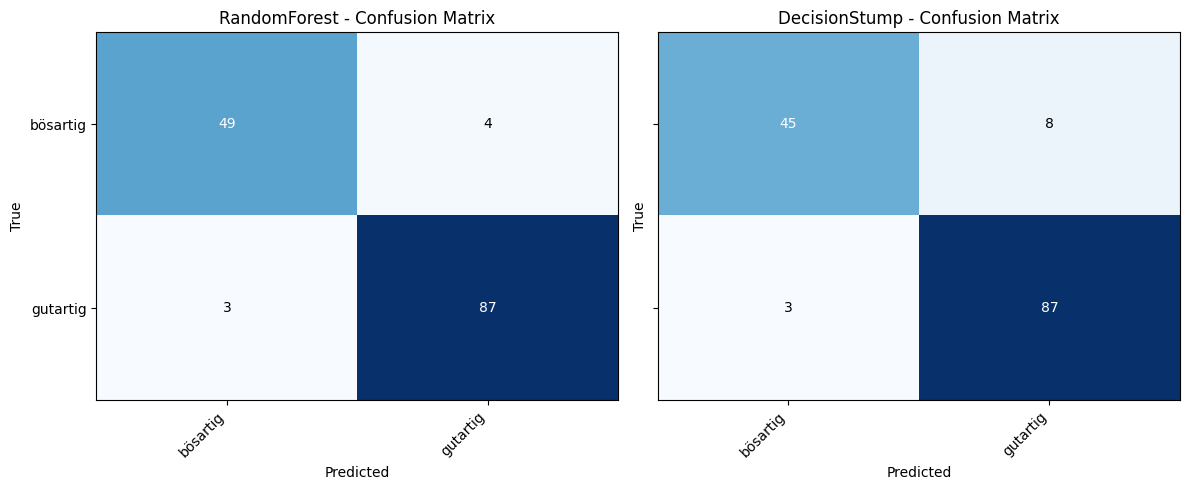

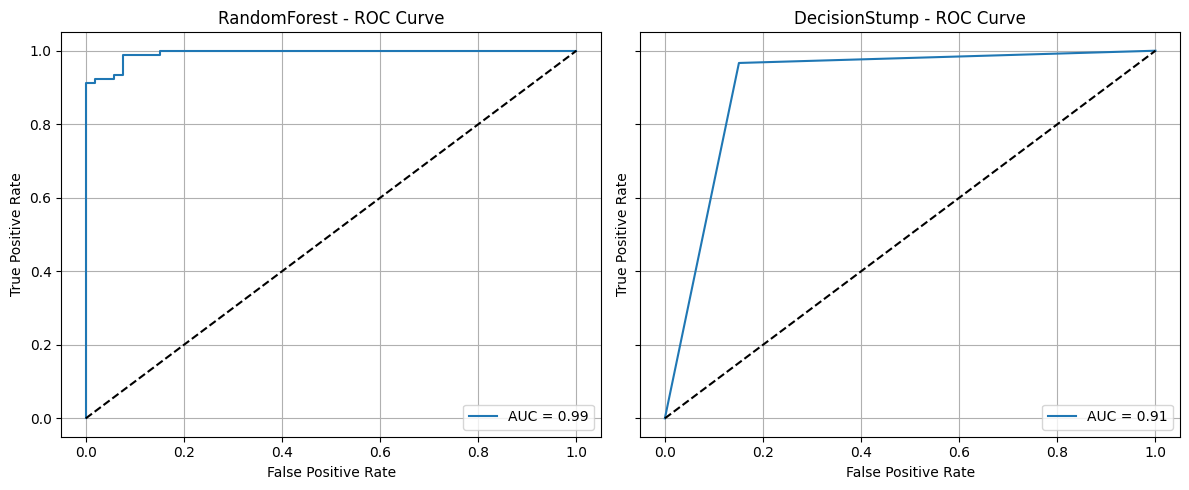

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    im = ax.imshow(cm, cmap='Blues', aspect='auto')
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['bösartig', 'gutartig'], rotation=45, ha='right')
    ax.set_yticklabels(['bösartig', 'gutartig'])
    for (i, j), val in np.ndenumerate(cm):
        color = 'white' if val > cm.max() / 2 else 'black'
        ax.text(j, i, val, ha='center', va='center', color=color)

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for ax, metric in zip(axes2, roc_curve_data):
    fpr = metric['FPR']
    tpr = metric['TPR']
    auc = metric['ROC AUC']
    name = metric['Model']

    ax.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(f"{name} - ROC Curve")
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout()
plt.show()
